# Model Building

## Imports and Installs

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb

In [2]:
# Define the path to the file
file_path = r"C:\Users\aariz\Documents\AUS\Semester 8\COE 444\Project\Dataset\Final\Processed_Dataset_Final.csv"

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
df.shape

(8775013, 47)

In [4]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
0,138.2,7.1,83.1,39123.054540,39123.054540,0.0,0.0,0.0,0.0,0.5,...,99.0,1.694703e+08,5.5,15.954786,82.751168,3899.571692,0.9,38.5,Benign,Benign
1,86.0,4.2,44.8,72928.095973,72928.095973,0.0,0.0,0.0,0.0,0.3,...,64.4,1.694703e+08,13.5,13.405243,63.022662,1993.712535,1.0,244.6,Benign,Benign
2,171.4,4.1,32.0,52552.111857,52552.111857,0.0,0.0,0.0,0.0,0.2,...,152.1,9.108920e-02,5.5,14.407632,209.990584,42487.982728,0.9,38.5,Benign,Benign
3,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604610,1.0,244.6,Benign,Benign
4,347.6,7.1,64.0,6263.156480,6263.156480,0.0,0.0,0.0,0.0,0.5,...,162.5,9.976871e-02,5.5,15.169114,164.378795,30786.754580,0.9,38.5,Benign,Benign


In [5]:
df.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
8775008,9239255.500,17.0,64.0,179.848711,179.848711,0.0,0.0,0.0,0.0,0.0,...,841.300000,3.551102e-03,5.5,47.725866,234.290907,71887.233230,0.400000,38.500000,ARP Spoofing,Spoofing
8775009,7394141.600,17.0,64.0,179.835432,179.835432,0.0,0.0,0.0,0.0,0.0,...,174.000000,1.694024e+08,13.5,35.406877,722.481741,261080.788500,1.000000,244.600000,ARP Spoofing,Spoofing
8775010,9244144.300,17.0,64.0,179.817936,179.817936,0.0,0.0,0.0,0.0,0.0,...,155.600000,6.567001e-03,5.5,16.870446,66.489690,2760.536111,0.900000,38.500000,ARP Spoofing,Spoofing
8775011,9245943.800,17.0,64.0,179.787417,179.787417,0.0,0.0,0.0,0.0,0.0,...,195.700000,1.694024e+08,13.5,18.379019,87.360431,3816.028882,1.000000,244.600000,ARP Spoofing,Spoofing
8775012,9247477.333,17.0,64.0,179.763126,179.763126,0.0,0.0,0.0,0.0,0.0,...,508.666667,9.183963e-03,2.0,21.508466,258.633119,80933.935190,0.666667,4.666667,ARP Spoofing,Spoofing


In [6]:
# Check for missing values in the entire DataFrame
print("Missing values in each column:\n", df.isnull().sum())

# Check for any missing value in the entire DataFrame
print("Any missing value in the DataFrame:", df.isnull().values.any())

Missing values in each column:
 Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
Attack             0
Ca

In [6]:
# Initialize the label encoders for each categorical column
label_encoder_attack = LabelEncoder()
label_encoder_category = LabelEncoder()

# Fit the label encoders and transform the categorical columns to integers
df['Attack'] = label_encoder_attack.fit_transform(df['Attack'])
df['Category'] = label_encoder_category.fit_transform(df['Category'])


In [7]:
attack_mappings = {index: label for index, label in enumerate(label_encoder_attack.classes_)}
print('Attack Mappings:', attack_mappings)

# Getting the class mappings for 'Category'
category_mappings = {index: label for index, label in enumerate(label_encoder_category.classes_)}
print('Category Mappings:', category_mappings)

Attack Mappings: {0: 'ARP Spoofing', 1: 'Benign', 2: 'DDoS-Connect-Flood', 3: 'DDoS-ICMP', 4: 'DDoS-Publish-Flood', 5: 'DDoS-SYN', 6: 'DDoS-TCP', 7: 'DDoS-UDP', 8: 'DoS-Connect-Flood', 9: 'DoS-ICMP', 10: 'DoS-Publish-Flood', 11: 'DoS-SYN', 12: 'DoS-TCP', 13: 'DoS-UDP', 14: 'Malformed-Data', 15: 'OS-Scan', 16: 'Ping-Sweep', 17: 'Port-Scan', 18: 'VulScan'}
Category Mappings: {0: 'Benign', 1: 'DDoS', 2: 'DoS', 3: 'MQTT', 4: 'Recon', 5: 'Spoofing'}


In [8]:
# Generate summary statistics for the DataFrame
summary_statistics = df.describe()

# Include 'object' columns in the summary statistics (categorical columns)
summary_statistics_including_objects = df.describe(include='all')

print("Summary Statistics:\n", summary_statistics)
print("\nSummary Statistics Including Categorical Columns:\n", summary_statistics_including_objects)


Summary Statistics:
        Header_Length  Protocol Type      Duration          Rate         Srate  \
count   8.775013e+06   8.775013e+06  8.775013e+06  8.775013e+06  8.775013e+06   
mean    2.996247e+04   8.047203e+00  6.463691e+01  1.574449e+04  1.574449e+04   
std     2.823634e+05   6.304832e+00  7.853066e+00  4.000855e+04  4.000855e+04   
min     0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.170000e+00   1.050000e+00  6.400000e+01  6.422731e+00  6.422731e+00   
50%     1.080000e+02   6.000000e+00  6.400000e+01  1.331419e+02  1.331419e+02   
75%     1.942100e+04   1.700000e+01  6.400000e+01  1.975920e+04  1.975920e+04   
max     9.896704e+06   1.700000e+01  2.550000e+02  2.097152e+06  2.097152e+06   

           Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
count  8775013.0     8.775013e+06     8.775013e+06     8.775013e+06   
mean         0.0     5.123298e-03     1.572115e-01     3.951838e-02   
std          0.0     3.415862e-02   

In [9]:
# Selecting columns to scale (all columns except 'Attack' and 'Category')
columns_to_scale = df.columns.difference(['Attack', 'Category'])

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler to the data and transforming it
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now, df has scaled features for all columns except 'Attack' and 'Category'



In [50]:
df.head(10)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack,Category
0,0.000014,0.417647,0.325882,1.865533e-02,1.865533e-02,0.0,0.0,0.0,0.0,0.5,...,0.038723,9.999968e-01,0.321429,0.148045,0.081110,0.007493,0.9,0.153941,1,0
1,0.000009,0.247059,0.175686,3.477483e-02,3.477483e-02,0.0,0.0,0.0,0.0,0.3,...,0.015217,9.999968e-01,0.892857,0.092453,0.061773,0.003831,1.0,1.000000,1,0
2,0.000017,0.241176,0.125490,2.505880e-02,2.505880e-02,0.0,0.0,0.0,0.0,0.2,...,0.074796,8.102576e-09,0.321429,0.114310,0.205826,0.081639,0.9,0.153941,1,0
3,0.000023,0.352941,0.250980,1.168373e-02,1.168373e-02,0.0,0.0,0.0,0.0,0.5,...,0.025951,9.999968e-01,0.892857,0.148745,0.298283,0.089653,1.0,1.000000,1,0
4,0.000035,0.417647,0.250980,2.986506e-03,2.986506e-03,0.0,0.0,0.0,0.0,0.5,...,0.081861,8.153792e-09,0.321429,0.130913,0.161119,0.059155,0.9,0.153941,1,0
5,0.000042,0.352941,0.250980,1.336756e-06,1.336756e-06,0.0,0.0,0.0,0.0,0.5,...,0.026291,9.999968e-01,0.892857,0.157651,0.295204,0.087792,1.0,1.000000,1,0
6,0.000047,0.352941,0.250980,1.068191e-02,1.068191e-02,0.0,0.0,0.0,0.0,0.5,...,0.026359,8.156487e-09,0.321429,0.067822,0.015005,0.000263,0.9,0.153941,1,0
7,0.000064,0.352941,0.250980,1.092751e-06,1.092751e-06,0.0,0.0,0.0,0.0,0.5,...,0.024592,9.999968e-01,0.892857,0.074283,0.021929,0.000482,1.0,1.000000,1,0
8,0.000062,0.352941,0.250980,9.179035e-07,9.179035e-07,0.0,0.0,0.0,0.0,0.5,...,0.024660,7.565952e-09,0.321429,0.074218,0.021783,0.000540,0.9,0.153941,1,0
9,0.000076,0.482353,0.325882,1.020575e-06,1.020575e-06,0.0,0.0,0.0,0.0,0.4,...,0.043614,9.999968e-01,0.892857,0.097957,0.065306,0.004534,1.0,1.000000,1,0


## Running all Classifiers

In [19]:
# Prepare your data
X = df.drop(columns=['Attack', 'Category'])
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85, stratify = y)

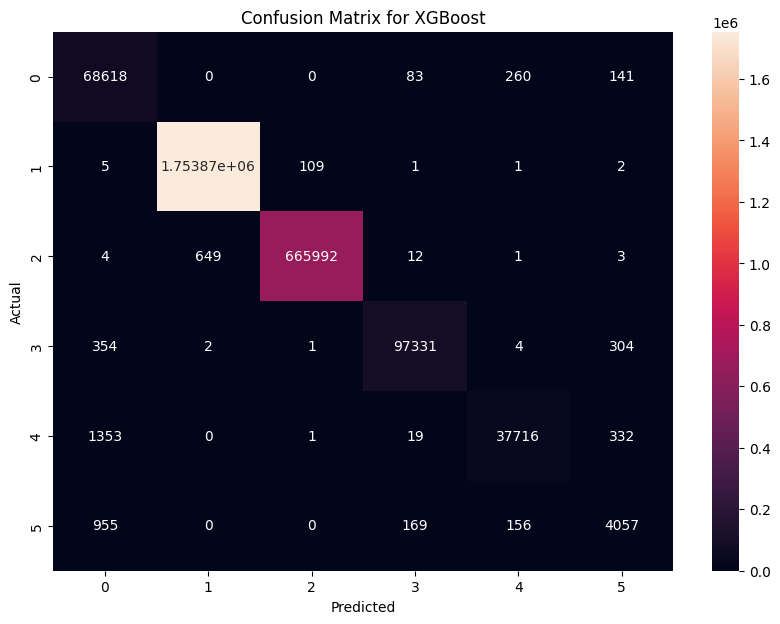

Results for XGBoost:

Accuracy: 0.9981306771043843
Precision (Weighted): 0.9981254584929363
Recall (Weighted): 0.9981306771043843
F1 Score (Weighted): 0.9981137717694966

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     69102
           1       1.00      1.00      1.00   1753987
           2       1.00      1.00      1.00    666661
           3       1.00      0.99      1.00     97996
           4       0.99      0.96      0.97     39421
           5       0.84      0.76      0.80      5337

    accuracy                           1.00   2632504
   macro avg       0.96      0.95      0.96   2632504
weighted avg       1.00      1.00      1.00   2632504


-----------------------



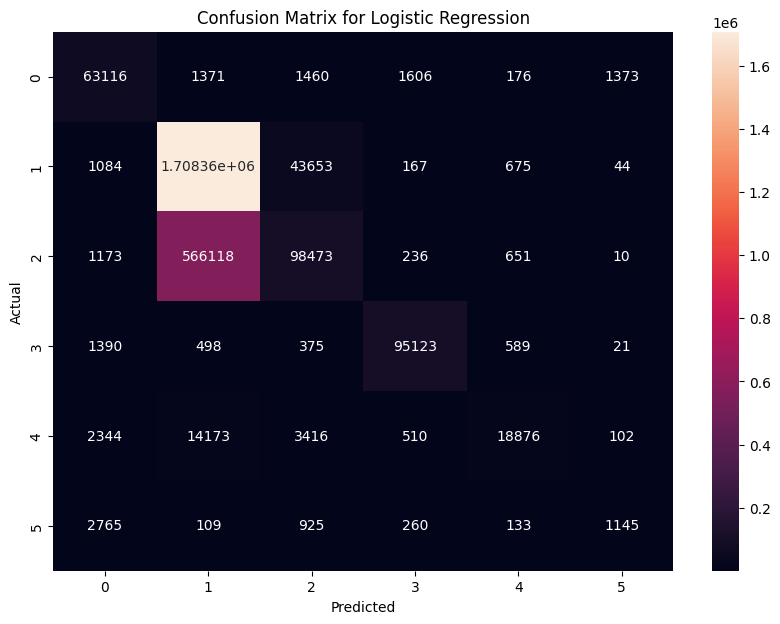

Results for Logistic Regression:

Accuracy: 0.7540717886848415
Precision (Weighted): 0.7385467634449043
Recall (Weighted): 0.7540717886848415
F1 Score (Weighted): 0.6936206171949589

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     69102
           1       0.75      0.97      0.84   1753987
           2       0.66      0.15      0.24    666661
           3       0.97      0.97      0.97     97996
           4       0.89      0.48      0.62     39421
           5       0.42      0.21      0.29      5337

    accuracy                           0.75   2632504
   macro avg       0.76      0.62      0.64   2632504
weighted avg       0.74      0.75      0.69   2632504


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


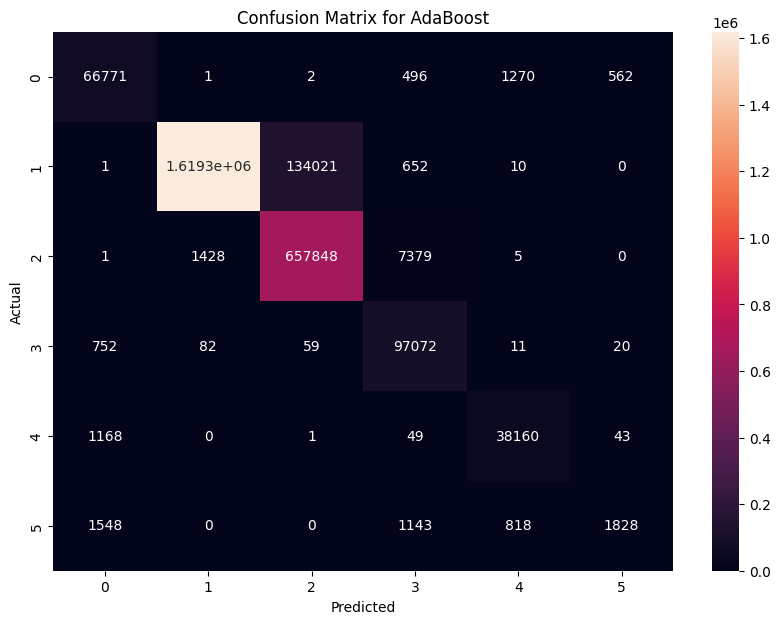

Results for AdaBoost:

Accuracy: 0.9424418728328617
Precision (Weighted): 0.9505148536322493
Recall (Weighted): 0.9424418728328617
F1 Score (Weighted): 0.9435640483060505

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     69102
           1       1.00      0.92      0.96   1753987
           2       0.83      0.99      0.90    666661
           3       0.91      0.99      0.95     97996
           4       0.95      0.97      0.96     39421
           5       0.75      0.34      0.47      5337

    accuracy                           0.94   2632504
   macro avg       0.90      0.86      0.87   2632504
weighted avg       0.95      0.94      0.94   2632504


-----------------------



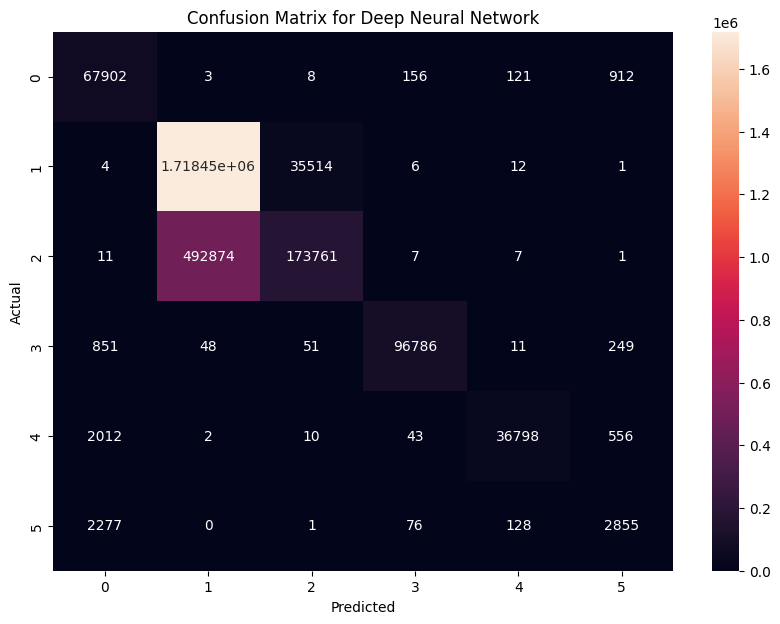

Results for Deep Neural Network:

Accuracy: 0.7964098060249861
Precision (Weighted): 0.8055998789712018
Recall (Weighted): 0.7964098060249861
F1 Score (Weighted): 0.7555400563975447

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     69102
           1       0.78      0.98      0.87   1753987
           2       0.83      0.26      0.40    666661
           3       1.00      0.99      0.99     97996
           4       0.99      0.93      0.96     39421
           5       0.62      0.53      0.58      5337

    accuracy                           0.80   2632504
   macro avg       0.86      0.78      0.79   2632504
weighted avg       0.81      0.80      0.76   2632504


-----------------------



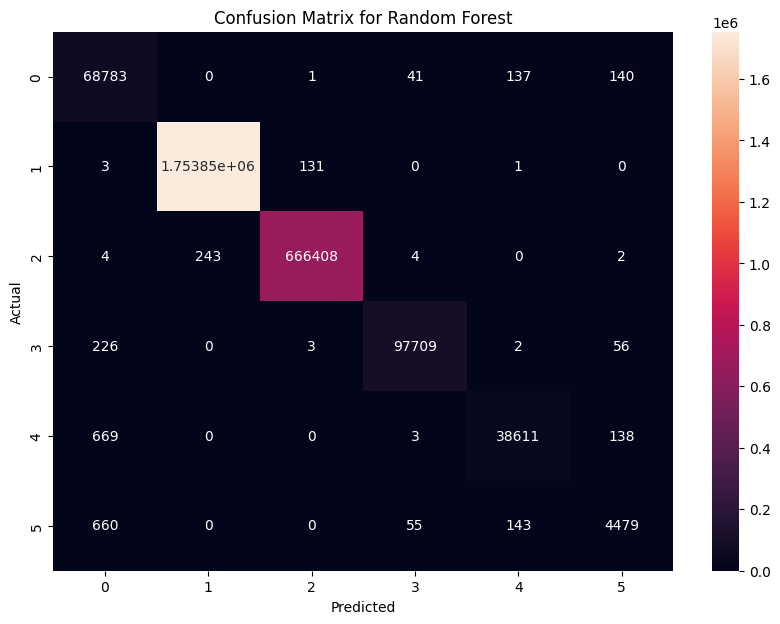

Results for Random Forest:

Accuracy: 0.9989887954586204
Precision (Weighted): 0.9989839093158527
Recall (Weighted): 0.9989887954586204
F1 Score (Weighted): 0.9989788484586953

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     69102
           1       1.00      1.00      1.00   1753987
           2       1.00      1.00      1.00    666661
           3       1.00      1.00      1.00     97996
           4       0.99      0.98      0.99     39421
           5       0.93      0.84      0.88      5337

    accuracy                           1.00   2632504
   macro avg       0.98      0.97      0.98   2632504
weighted avg       1.00      1.00      1.00   2632504


-----------------------

            Model Name  Accuracy  Precision (Weighted)  Recall (Weighted)  \
0              XGBoost  0.998131              0.998125           0.998131   
1  Logistic Regression  0.754072              0.738547           0.754072   

In [20]:
# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

# PCA Analysis

In [2]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb

In [22]:
pca = PCA(n_components=0.95)  # Adjust n_components based on your dataset
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

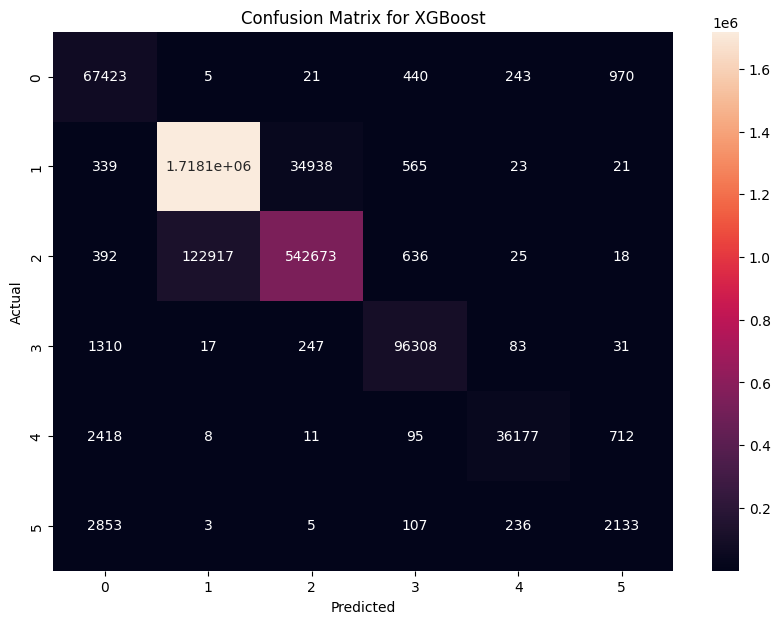

Results for XGBoost:

Accuracy: 0.9355408386843856
Precision (Weighted): 0.935639501907288
Recall (Weighted): 0.9355408386843856
F1 Score (Weighted): 0.9340085773246651

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     69102
           1       0.93      0.98      0.96   1753987
           2       0.94      0.81      0.87    666661
           3       0.98      0.98      0.98     97996
           4       0.98      0.92      0.95     39421
           5       0.55      0.40      0.46      5337

    accuracy                           0.94   2632504
   macro avg       0.88      0.84      0.86   2632504
weighted avg       0.94      0.94      0.93   2632504


-----------------------



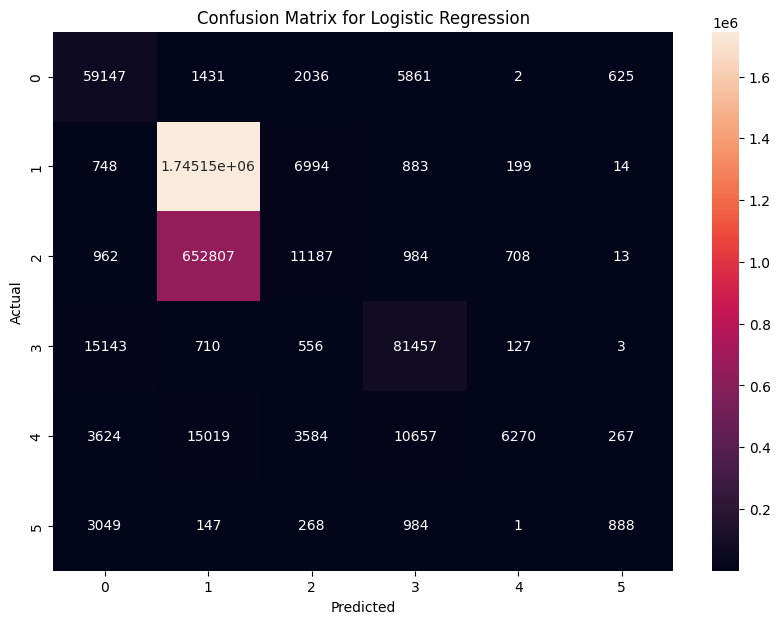

Results for Logistic Regression:

Accuracy: 0.7233029845348763
Precision (Weighted): 0.6591661417455204
Recall (Weighted): 0.7233029845348763
F1 Score (Weighted): 0.6214588028373844

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78     69102
           1       0.72      0.99      0.84   1753987
           2       0.45      0.02      0.03    666661
           3       0.81      0.83      0.82     97996
           4       0.86      0.16      0.27     39421
           5       0.49      0.17      0.25      5337

    accuracy                           0.72   2632504
   macro avg       0.67      0.50      0.50   2632504
weighted avg       0.66      0.72      0.62   2632504


-----------------------



c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aariz\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:150

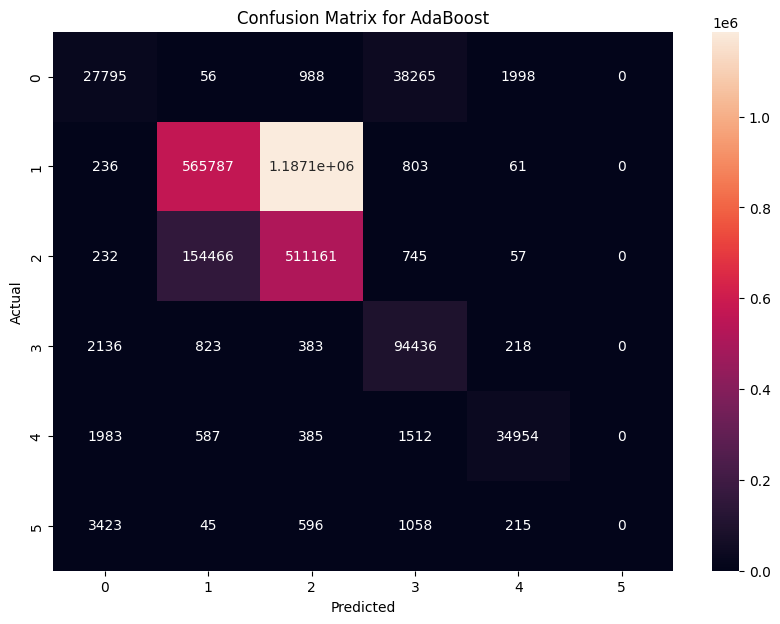

Results for AdaBoost:

Accuracy: 0.4688057454043755
Precision (Weighted): 0.658440246382845
Recall (Weighted): 0.4688057454043755
F1 Score (Weighted): 0.47135698544866533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.40      0.53     69102
           1       0.78      0.32      0.46   1753987
           2       0.30      0.77      0.43    666661
           3       0.69      0.96      0.80     97996
           4       0.93      0.89      0.91     39421
           5       0.00      0.00      0.00      5337

    accuracy                           0.47   2632504
   macro avg       0.58      0.56      0.52   2632504
weighted avg       0.66      0.47      0.47   2632504


-----------------------



In [23]:
# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

# Feature Selection (using RFE + Random Forest)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can choose any model

# Setup RFE with the RandomForestClassifier and select 10 features as an example
selector = RFE(RandomForestClassifier(n_jobs=-1), n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Transform data based on selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Defining the classifiers
classifiers = {
    "XGBoost": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss'),
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

# Object to store results
results = []

# Iterate, train, and evaluate classifiers using the selected features
for name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = precision_score(y_test, y_pred, average='weighted')
    f1_class = f1_score(y_test, y_pred, average=None)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Results for {name}:\n")
    print("Accuracy:", accuracy)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("F1 Score (Weighted):", f1)
    print("\nClassification Report:\n", report)
    print("\n-----------------------\n")

    results.append([name, accuracy, precision, recall, f1])

# Summary table
results_df = pd.DataFrame(results, columns=["Model Name", "Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1 (Weighted)"])
results_df

*Next steps:* 

1. Run XGBoost 
2. Aggregate Spoofing Class with CIC-IoT 2022 Data
    - Check if columns are same 
    - Check if data distribution is the same
3. Run models again, get eval metrics
4. PCA, Feature Selection
4. Run models again

Store all metrics, results of before and after and put into Google Doc